<a href="https://colab.research.google.com/github/junsookim76/Ewha_2025/blob/main/6_MP_QSPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
!wget https://raw.githubusercontent.com/junsookim76/Ewha_2025/main/6_MP_QSPR.csv


--2025-05-28 09:34:50--  https://raw.githubusercontent.com/junsookim76/Ewha_2025/main/6_MP_QSPR.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 291200 (284K) [text/plain]
Saving to: ‘6_MP_QSPR.csv.3’

6_MP_QSPR.csv.3     100%[===================>] 284.38K  --.-KB/s    in 0.04s   

2025-05-28 09:34:50 (6.51 MB/s) - ‘6_MP_QSPR.csv.3’ saved [291200/291200]



In [92]:
import pandas as pd
import numpy as np

csv_file_name = "6_MP_QSPR.csv"

sample_data = pd.read_csv(csv_file_name,skiprows=1,sep=",")

In [93]:
print(sample_data.shape)
print(sample_data.head(5))

(262, 143)
  Title                      Name  \
0  Mol1    1,2,3-trichlorobenzene   
1  Mol2    1,3,5-trichlorobenzene   
2  Mol3   11a-hydroxyprogesterone   
3  Mol4  17alpha-ethynylestradiol   
4  Mol5           3,4-benzopyrene   

                                              SMILES   ALogP    ALogp2  \
0                            C1=CC(=C(C(=C1)Cl)Cl)Cl  2.5095  6.297590   
1                              C1=C(C=C(C=C1Cl)Cl)Cl  2.5095  6.297590   
2  O=C4\C=C2/[C@]([C@H]1[C@H](O)C[C@@]3(C(C(=O)C)...  0.1509  0.022771   
3  C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O)CCC4...  1.5135  2.290682   
4       C1=CC=C2C3=C4C(=CC2=C1)C=CC5=C4C(=CC=C5)C=C3  3.1132  9.692014   

       AMR   BCUTw-1l   BCUTw-1h  BCUTc-1l  BCUTc-1h  ...     WTPT-1  \
0  45.1044  11.998562  34.971057 -0.172315  0.143911  ...  17.382533   
1  45.1044  11.998562  34.971057 -0.177867  0.124170  ...  17.381716   
2  93.4185  11.900000  15.996930 -0.392534  0.206734  ...  49.210219   
3  88.3621  11.996151  15.998265 

In [94]:
X = sample_data.iloc[:,3:-1]
y = sample_data.iloc[:,-1:].values

In [95]:
X.head()

,ALogP,ALogp2,AMR,BCUTw-1l,BCUTw-1h,BCUTc-1l,BCUTc-1h,BCUTp-1l,BCUTp-1h,fragC,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,2.5095,6.297590,45.1044,11.998562,34.971057,-0.172315,0.143911,6.615496,10.155381,72.03,...,179.930033,17.382533,1.931393,7.466759,0.000000,0.0,82,11,2.547,42
1,2.5095,6.297590,45.1044,11.998562,34.971057,-0.177867,0.124170,6.370548,9.182254,72.03,...,179.930033,17.381716,1.931302,7.483715,0.000000,0.0,84,9,2.547,42
2,0.1509,0.022771,93.4185,11.900000,15.996930,-0.392534,0.206734,4.819646,12.609025,2697.03,...,330.219495,49.210219,2.050426,7.551241,7.551241,0.0,1149,51,2.741,142
3,1.5135,2.290682,88.3621,11.996151,15.998265,-0.386831,0.131177,5.036036,12.015619,1939.02,...,296.177630,45.560936,2.070952,5.076087,5.076087,0.0,941,46,3.493,130
4,3.1132,9.692014,93.4252,11.850000,12.150270,-0.182512,0.120933,7.210065,11.609920,916.00,...,252.093900,43.297534,2.164877,0.000000,0.000000,0.0,680,40,5.956,120


In [96]:
y[:5]

array([[ 52.6],
       [ 63.4],
       [222. ],
       [235. ],
       [179. ]])

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
sample_data

,Title,Name,SMILES,ALogP,ALogp2,AMR,BCUTw-1l,BCUTw-1h,BCUTc-1l,BCUTc-1h,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,mp (°C)
0,Mol1,"1,2,3-trichlorobenzene",C1=CC(=C(C(=C1)Cl)Cl)Cl,2.5095,6.297590,45.1044,11.998562,34.971057,-0.172315,0.143911,...,17.382533,1.931393,7.466759,0.000000,0.000000,82,11,2.547,42,52.6
1,Mol2,"1,3,5-trichlorobenzene",C1=C(C=C(C=C1Cl)Cl)Cl,2.5095,6.297590,45.1044,11.998562,34.971057,-0.177867,0.124170,...,17.381716,1.931302,7.483715,0.000000,0.000000,84,9,2.547,42,63.4
2,Mol3,11a-hydroxyprogesterone,O=C4\C=C2/[C@]([C@H]1[C@H](O)C[C@@]3(C(C(=O)C)...,0.1509,0.022771,93.4185,11.900000,15.996930,-0.392534,0.206734,...,49.210219,2.050426,7.551241,7.551241,0.000000,1149,51,2.741,142,222.0
3,Mol4,17alpha-ethynylestradiol,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O)CCC4...,1.5135,2.290682,88.3621,11.996151,15.998265,-0.386831,0.131177,...,45.560936,2.070952,5.076087,5.076087,0.000000,941,46,3.493,130,235.0
4,Mol5,"3,4-benzopyrene",C1=CC=C2C3=C4C(=CC2=C1)C=CC5=C4C(=CC=C5)C=C3,3.1132,9.692014,93.4252,11.850000,12.150270,-0.182512,0.120933,...,43.297534,2.164877,0.000000,0.000000,0.000000,680,40,5.956,120,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Mol258,triamcinolone acetonide,C[C@]12C[C@@H]([C@]3([C@H]([C@@H]1C[C@@H]4[C@]...,-0.6599,0.435468,110.5159,11.996133,18.998409,-0.413537,0.193229,...,63.307633,2.042182,18.775849,16.171931,0.000000,2185,76,1.224,192,293.0
258,Mol259,triamterene,C1=CC=C(C=C1)C2=NC3=C(N=C(N=C3N=C2N)N)N,-1.3099,1.715838,71.4449,11.993387,14.011247,-0.311911,0.201769,...,38.981427,2.051654,19.994226,0.000000,19.994226,670,31,-1.459,102,316.0
259,Mol260,triflupromazine,CN(C)CCCN1C2=CC=CC=C2SC3=C1C=C(C=C3)C(F)(F)F,2.4789,6.144945,101.7558,11.997387,31.972072,-0.308926,0.436838,...,48.736651,2.030694,16.935494,0.000000,6.572016,1286,39,3.329,128,25.0
260,Mol261,trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,-1.7167,2.947059,79.8372,11.993356,15.996931,-0.346890,0.224029,...,41.920623,1.996220,19.444827,8.411015,11.033812,946,33,-0.545,104,200.4


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [102]:
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

# 모델을 실행합니다.
model.compile(optimizer ='adam', loss = 'mean_absolute_error')

# 20회 이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 이름을 정합니다.
modelpath="./MP_full.keras"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다.
history = model.fit(
    X_train, y_train, validation_split=0.25, epochs=1000,
    batch_size=20, callbacks=[early_stopping_callback, checkpointer])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 30)             │         4,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 40)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,121 (27.82 KB)

 Trainable params: 7,121 (27.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 410.5268 - val_loss: 155.1978
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 115.9128 - val_loss: 148.4657
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 116.1989 - val_loss: 84.3473
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 77.0542 - val_loss: 83.1107
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.6876 - val_loss: 78.7792
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 65.5003 - val_loss: 69.5828
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 65.4647 - val_loss: 64.3726
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 61.3792 - val_loss: 61.7733
Epoch 9/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 63.5101 - val_loss: 62.7241
Epoch 10/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 63.4617 - val_loss: 70.5856
Epoch 11/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 61.3445 - val_loss: 59.0153
Epoch 12/1000
8/8 ━━━━━━━━━━━━━━━━━━

In [103]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_MP =[]
pred_MP = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다.
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i][0]
    prediction = Y_prediction[i]
    print("실제녹는점: {:.2f}, 예상녹는점: {:.2f}".format(real, prediction))
    real_MP.append(real)
    pred_MP.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
실제녹는점: 157.00, 예상녹는점: 157.72
실제녹는점: 300.00, 예상녹는점: 290.46
실제녹는점: 112.00, 예상녹는점: 159.60
실제녹는점: 263.00, 예상녹는점: 217.73
실제녹는점: 232.50, 예상녹는점: 284.57
실제녹는점: 117.50, 예상녹는점: 149.14
실제녹는점: 100.00, 예상녹는점: 174.46
실제녹는점: 87.50, 예상녹는점: 168.30
실제녹는점: 185.30, 예상녹는점: 239.06
실제녹는점: 112.50, 예상녹는점: 161.32
실제녹는점: 122.40, 예상녹는점: 131.70
실제녹는점: 165.50, 예상녹는점: 230.36
실제녹는점: 147.00, 예상녹는점: 81.80
실제녹는점: 116.00, 예상녹는점: 45.83
실제녹는점: 160.00, 예상녹는점: 228.93
실제녹는점: 75.50, 예상녹는점: 154.32
실제녹는점: 125.00, 예상녹는점: 101.12
실제녹는점: 293.00, 예상녹는점: 265.45
실제녹는점: 161.00, 예상녹는점: 185.26
실제녹는점: 93.00, 예상녹는점: 103.42
실제녹는점: 134.40, 예상녹는점: 104.66
실제녹는점: 159.00, 예상녹는점: 199.44
실제녹는점: 109.00, 예상녹는점: 64.14
실제녹는점: 74.60, 예상녹는점: 105.77
실제녹는점: 134.50, 예상녹는점: 230.86


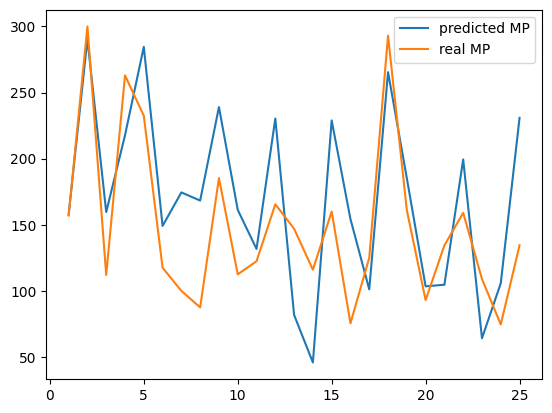

In [104]:
plt.plot(X_num, pred_MP, label='predicted MP')
plt.plot(X_num, real_MP, label='real MP')
plt.legend()
plt.show()